## import packages and load datasets

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
#load datasets
companiesDF = pd.read_csv('sp500_companies.csv')
stocksDF = pd.read_csv('sp500_stocks.csv', parse_dates=['Date'])
indexDF = pd.read_csv('sp500_index.csv', parse_dates=['Date'], index_col=['Date'])

# SP 500 Companies Info
### Inspect and Clean Dataset

In [207]:
#examine
companiesDF.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,147.27,2366746918912,1.295570e+11,0.019,Cupertino,CA,United States,154000.0,"Apple Inc. designs, manufactures, and markets ...",0.070529
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,242.12,1817832062976,9.798300e+10,0.124,Redmond,WA,United States,221000.0,"Microsoft Corporation develops, licenses, and ...",0.054171
2,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,101.13,1322972479488,9.688700e+10,0.126,Mountain View,CA,United States,174014.0,Alphabet Inc. provides various products and pl...,0.039425
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,101.48,1319432880128,9.688700e+10,0.126,Mountain View,CA,United States,174014.0,Alphabet Inc. provides various products and pl...,0.039319
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,119.32,1215584403456,5.262000e+10,0.072,Seattle,WA,United States,1523000.0,"Amazon.com, Inc. engages in the retail sale of...",0.036224


In [208]:
#info
companiesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             495 non-null    object 
 1   Symbol               495 non-null    object 
 2   Shortname            495 non-null    object 
 3   Longname             495 non-null    object 
 4   Sector               495 non-null    object 
 5   Industry             495 non-null    object 
 6   Currentprice         495 non-null    float64
 7   Marketcap            495 non-null    int64  
 8   Ebitda               464 non-null    float64
 9   Revenuegrowth        493 non-null    float64
 10  City                 495 non-null    object 
 11  State                476 non-null    object 
 12  Country              495 non-null    object 
 13  Fulltimeemployees    488 non-null    float64
 14  Longbusinesssummary  495 non-null    object 
 15  Weight               495 non-null    flo

In [209]:
#describe
companiesDF.describe()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,495.000000,4.950000e+02,4.640000e+02,493.000000,4.880000e+02,495.000000
mean,152.985525,6.779199e+10,6.074628e+09,0.610320,5.565945e+04,0.002020
std,254.780212,1.769839e+11,1.218288e+10,7.771756,1.451226e+05,0.005274
min,6.660000,4.291737e+09,-2.586000e+09,-0.643000,1.050000e+02,0.000128
25%,55.310000,1.484046e+10,1.371575e+09,0.032000,9.259250e+03,0.000442
50%,95.390000,2.734154e+10,2.562371e+09,0.102000,1.937500e+04,0.000815
75%,175.800000,5.673580e+10,5.656601e+09,0.194000,5.315000e+04,0.001691
max,4046.650000,2.366747e+12,1.295570e+11,167.368000,2.300000e+06,0.070529


In [210]:
#evaluating nulls
companiesDF.isnull().sum()

Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 31
Revenuegrowth           2
City                    0
State                  19
Country                 0
Fulltimeemployees       7
Longbusinesssummary     0
Weight                  0
dtype: int64

In [211]:
#values in Sector
companiesDF['Sector'].unique()

array(['Technology', 'Communication Services', 'Consumer Cyclical',
       'Financial Services', 'Healthcare', 'Energy', 'Consumer Defensive',
       'Basic Materials', 'Industrials', 'Utilities', 'Real Estate'],
      dtype=object)

### Visualize Data to Understand Better

In [212]:
#count of companies in each sector
companycount = companiesDF.groupby('Sector')['Symbol'].count().sort_values(ascending=True)

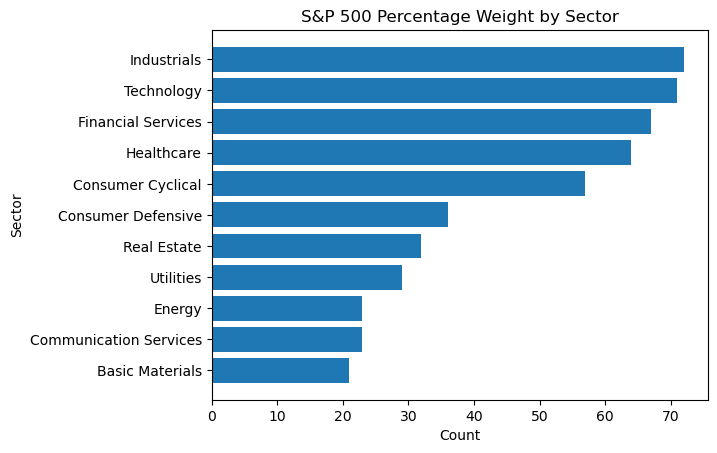

In [213]:
#visualize sector count
companycountdf = pd.DataFrame(companycount)
plt.barh(data=companycountdf, y=companycountdf.index, width='Symbol')
plt.xlabel('Count')
plt.ylabel('Sector')
plt.title('S&P 500 Percentage Weight by Sector')
plt.show()

In [214]:
#Find Sector Weight
sector_weight = companiesDF.groupby('Sector')['Weight'].sum().sort_values(ascending=True) * 100

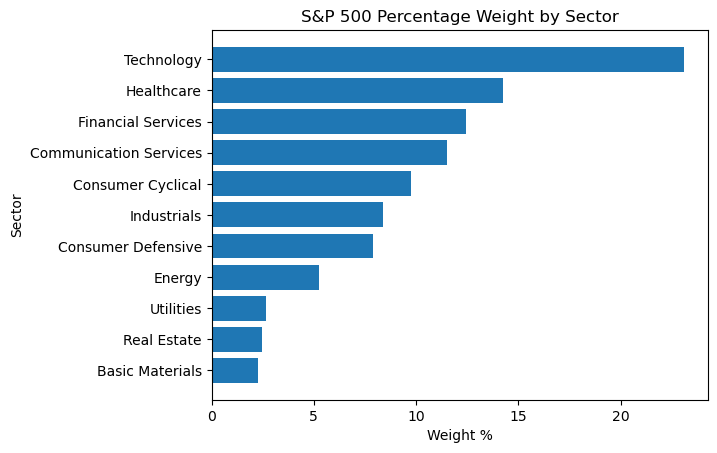

In [215]:
#visualize sector weight
sector_weight = pd.DataFrame(sector_weight)
plt.barh(data=sector_weight, y=sector_weight.index, width='Weight')
plt.xlabel('Weight %')
plt.ylabel('Sector')
plt.title('S&P 500 Percentage Weight by Sector')
plt.show()

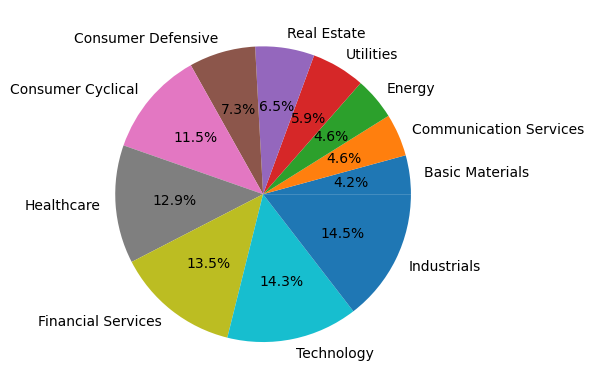

In [216]:
#visualize breakdown of companies in each sector
plt.pie(data=companycountdf, labels=companycountdf.index, x='Symbol', autopct='%1.1f%%')
plt.show()

In [217]:
#Number of companies in S&P 500
len(companiesDF.index)

495

In [218]:
#Top 20 percent of companies in weight make up for almost 70% of total weight
top20weight = companiesDF.sort_values(by='Weight', ascending=False).head((round(495 * .2)))
top20weight['Weight'].sum()

0.6949094399564406

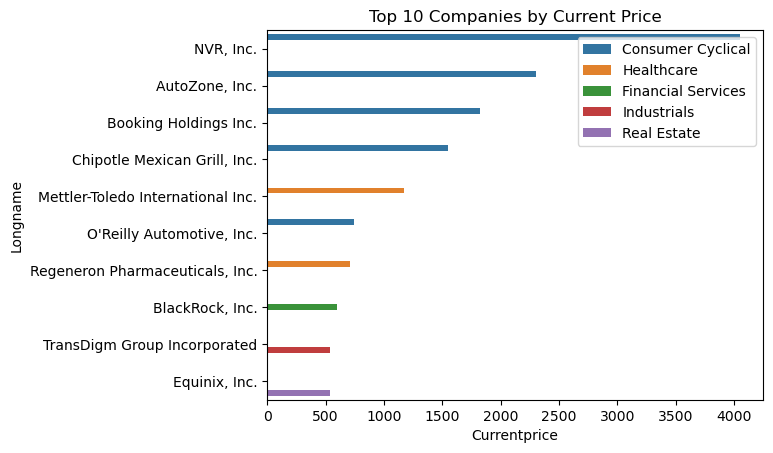

In [219]:
#Visualize top 10 companies
top10 = companiesDF[['Longname', 'Sector', 'Currentprice']].sort_values('Currentprice', ascending=False).head(10)
sns.barplot(data=top10, x='Currentprice', y='Longname', hue='Sector')
plt.title('Top 10 Companies by Current Price')
plt.legend()
plt.show()

# S&P 500 Index Data
### Inspect, Clean, Manipulate Fields

In [129]:
indexDF.head(10)

,S&P500
Date,
2012-10-22,1433.82
2012-10-23,1413.11
2012-10-24,1408.75
2012-10-25,1412.97
2012-10-26,1411.94
2012-10-31,1412.16
2012-11-01,1427.59
2012-11-02,1414.20
2012-11-05,1417.26


#### Reindexing S&P 500 dates and imputing with linear interpolation

In [130]:
#reindexing dates
idx = pd.date_range('2012-10-22', '2022-10-2')


indexDF.index = pd.DatetimeIndex(indexDF.index)

indexDF = indexDF.reindex(idx)

indexDF.head(10)

,S&P500
2012-10-22,1433.82
2012-10-23,1413.11
2012-10-24,1408.75
2012-10-25,1412.97
2012-10-26,1411.94
2012-10-27,NaN
2012-10-28,NaN
2012-10-29,NaN
2012-10-30,NaN
2012-10-31,1412.16


In [131]:
#adding impute column
indexDF['Imputated'] = np.where(indexDF['S&P500'].isna(), 'Yes', 'No')
indexDF.head(10)

,S&P500,Imputated
2012-10-22,1433.82,No
2012-10-23,1413.11,No
2012-10-24,1408.75,No
2012-10-25,1412.97,No
2012-10-26,1411.94,No
2012-10-27,NaN,Yes
2012-10-28,NaN,Yes
2012-10-29,NaN,Yes
2012-10-30,NaN,Yes
2012-10-31,1412.16,No


In [132]:
#linear interpolation
indexDF['S&P500'] = indexDF['S&P500'].interpolate('linear')
indexDF.head(10)

,S&P500,Imputated
2012-10-22,1433.820,No
2012-10-23,1413.110,No
2012-10-24,1408.750,No
2012-10-25,1412.970,No
2012-10-26,1411.940,No
2012-10-27,1411.984,Yes
2012-10-28,1412.028,Yes
2012-10-29,1412.072,Yes
2012-10-30,1412.116,Yes
2012-10-31,1412.160,No


In [133]:
#info
indexDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3633 entries, 2012-10-22 to 2022-10-02
Freq: D
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S&P500     3633 non-null   float64
 1   Imputated  3633 non-null   object 
dtypes: float64(1), object(1)
memory usage: 85.1+ KB


In [134]:
#describe
indexDF.describe()

,S&P500
count,3633.000000
mean,2688.571658
std,875.096431
min,1353.330000
25%,2025.120000
50%,2499.813333
75%,3140.980000
max,4796.560000


In [135]:
#examine
indexDF.head(100)

,S&P500,Imputated
2012-10-22,1433.820000,No
2012-10-23,1413.110000,No
2012-10-24,1408.750000,No
2012-10-25,1412.970000,No
2012-10-26,1411.940000,No
...,...,...
2013-01-25,1502.960000,No
2013-01-26,1502.033333,Yes
2013-01-27,1501.106667,Yes
2013-01-28,1500.180000,No


In [136]:
#any nulls?
indexDF.isnull().sum()

S&P500       0
Imputated    0
dtype: int64

In [137]:
#taking date out of the index
indexDF.reset_index(drop=False, inplace=True)

In [138]:
#rename
indexDF.rename(columns={'index':'Date'}, inplace=True)
indexDF

,Date,S&P500,Imputated
0,2012-10-22,1433.82,No
1,2012-10-23,1413.11,No
2,2012-10-24,1408.75,No
3,2012-10-25,1412.97,No
4,2012-10-26,1411.94,No
...,...,...,...
3628,2022-09-28,3719.04,No
3629,2022-09-29,3640.47,No
3630,2022-09-30,3585.62,No
3631,2022-10-01,3585.62,Yes


In [139]:
#manipulating to create more columns
indexDF['Year'] = indexDF['Date'].dt.year
indexDF['Month'] = indexDF['Date'].dt.month
indexDF['Month Name'] = indexDF['Date'].dt.month_name()
indexDF['Weekday'] = indexDF['Date'].dt.weekday
indexDF['Weekday Name'] = indexDF['Date'].dt.day_name()
indexDF['Quarter'] = indexDF['Date'].dt.quarter
indexDF['Day of Year'] = indexDF['Date'].dt.dayofyear
indexDF['Week of Year'] = indexDF['Date'].dt.isocalendar().week
indexDF.head(7)

,Date,S&P500,Imputated,Year,Month,Month Name,Weekday,Weekday Name,Quarter,Day of Year,Week of Year
0,2012-10-22,1433.820,No,2012,10,October,0,Monday,4,296,43
1,2012-10-23,1413.110,No,2012,10,October,1,Tuesday,4,297,43
2,2012-10-24,1408.750,No,2012,10,October,2,Wednesday,4,298,43
3,2012-10-25,1412.970,No,2012,10,October,3,Thursday,4,299,43
4,2012-10-26,1411.940,No,2012,10,October,4,Friday,4,300,43
5,2012-10-27,1411.984,Yes,2012,10,October,5,Saturday,4,301,43
6,2012-10-28,1412.028,Yes,2012,10,October,6,Sunday,4,302,43


In [140]:
#Add a row by row change column
dailychange = []
for i in range(len(indexDF)):
    if i == 0:
        dailychange.append(0)
    else:
        dailychange.append(indexDF['S&P500'][i] - indexDF['S&P500'][(i - 1)])
    i += 1
indexDF['change'] = dailychange
indexDF.head()

,Date,S&P500,Imputated,Year,Month,Month Name,Weekday,Weekday Name,Quarter,Day of Year,Week of Year,change
0,2012-10-22,1433.82,No,2012,10,October,0,Monday,4,296,43,0.00
1,2012-10-23,1413.11,No,2012,10,October,1,Tuesday,4,297,43,-20.71
2,2012-10-24,1408.75,No,2012,10,October,2,Wednesday,4,298,43,-4.36
3,2012-10-25,1412.97,No,2012,10,October,3,Thursday,4,299,43,4.22
4,2012-10-26,1411.94,No,2012,10,October,4,Friday,4,300,43,-1.03


In [141]:
#examining section of data
october2013 = indexDF.loc[(indexDF['Month'] == 10) & (indexDF['Year'] == 2013)]
october2013

,Date,S&P500,Imputated,Year,Month,Month Name,Weekday,Weekday Name,Quarter,Day of Year,Week of Year,change
344,2013-10-01,1695.000000,No,2013,10,October,1,Tuesday,4,274,40,13.450000
345,2013-10-02,1693.870000,No,2013,10,October,2,Wednesday,4,275,40,-1.130000
346,2013-10-03,1678.660000,No,2013,10,October,3,Thursday,4,276,40,-15.210000
347,2013-10-04,1690.500000,No,2013,10,October,4,Friday,4,277,40,11.840000
348,2013-10-05,1685.706667,Yes,2013,10,October,5,Saturday,4,278,40,-4.793333
349,2013-10-06,1680.913333,Yes,2013,10,October,6,Sunday,4,279,40,-4.793333
350,2013-10-07,1676.120000,No,2013,10,October,0,Monday,4,280,41,-4.793333
351,2013-10-08,1655.450000,No,2013,10,October,1,Tuesday,4,281,41,-20.670000
352,2013-10-09,1656.400000,No,2013,10,October,2,Wednesday,4,282,41,0.950000
353,2013-10-10,1692.560000,No,2013,10,October,3,Thursday,4,283,41,36.160000


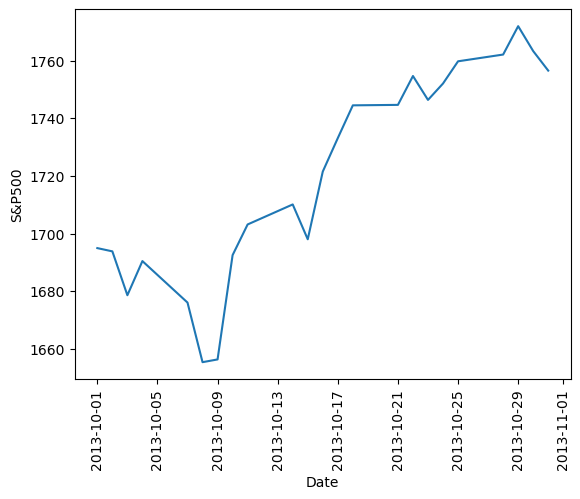

In [142]:
#visualize 
sns.lineplot(data=october2013, x='Date', y='S&P500')
plt.xticks(rotation=90)
plt.show()

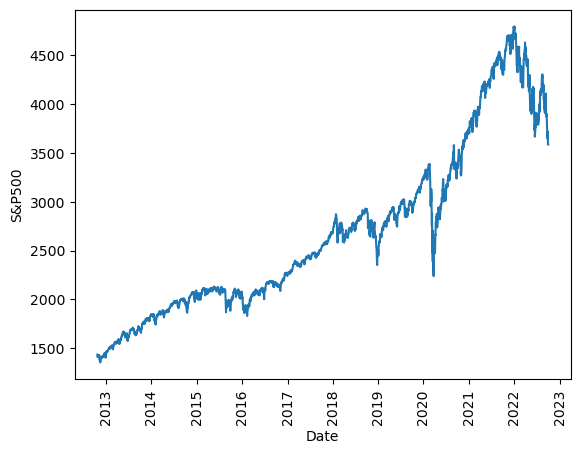

In [118]:
#visualize for the whole dataset
sns.lineplot(data=indexDF, x='Date', y='S&P500')
plt.xticks(rotation=90)
plt.show()

In [143]:
#checking out the top 10 and bottom 10 day changes
top10days = indexDF.sort_values(by='change', ascending=False).head(10)
bottom10days = indexDF.sort_values(by='change', ascending=True).head(10)
bottom10days

,Date,S&P500,Imputated,Year,Month,Month Name,Weekday,Weekday Name,Quarter,Day of Year,Week of Year,change
2698,2020-03-12,2480.64,No,2020,3,March,3,Thursday,1,72,11,-260.74
2789,2020-06-11,3002.10,No,2020,6,June,3,Thursday,2,163,24,-188.04
3613,2022-09-13,3932.69,No,2022,9,September,1,Tuesday,3,256,37,-177.72
3495,2022-05-18,3923.68,No,2022,5,May,2,Wednesday,2,138,20,-165.17
3476,2022-04-29,4131.93,No,2022,4,April,4,Friday,2,119,17,-155.57
3482,2022-05-05,4146.87,No,2022,5,May,3,Thursday,2,125,18,-153.30
3595,2022-08-26,4057.66,No,2022,8,August,4,Friday,3,238,34,-141.46
2697,2020-03-11,2741.38,No,2020,3,March,2,Wednesday,1,71,11,-140.85
2684,2020-02-27,2978.76,No,2020,2,February,3,Thursday,1,58,9,-137.63
2704,2020-03-18,2398.10,No,2020,3,March,2,Wednesday,1,78,12,-131.09


In [144]:
#adding rolling change columns for 7, 30, and 365 days
indexDF['Rolling7'] = indexDF['change'].rolling(7).sum()
indexDF['Rolling30'] = indexDF['change'].rolling(30).sum()
indexDF['Rolling90'] = indexDF['change'].rolling(90).sum()
indexDF['Rolling365'] = indexDF['change'].rolling(365).sum()
indexDF

,Date,S&P500,Imputated,Year,Month,Month Name,Weekday,Weekday Name,Quarter,Day of Year,Week of Year,change,Rolling7,Rolling30,Rolling90,Rolling365
0,2012-10-22,1433.82,No,2012,10,October,0,Monday,4,296,43,0.00,NaN,NaN,NaN,NaN
1,2012-10-23,1413.11,No,2012,10,October,1,Tuesday,4,297,43,-20.71,NaN,NaN,NaN,NaN
2,2012-10-24,1408.75,No,2012,10,October,2,Wednesday,4,298,43,-4.36,NaN,NaN,NaN,NaN
3,2012-10-25,1412.97,No,2012,10,October,3,Thursday,4,299,43,4.22,NaN,NaN,NaN,NaN
4,2012-10-26,1411.94,No,2012,10,October,4,Friday,4,300,43,-1.03,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628,2022-09-28,3719.04,No,2022,9,September,2,Wednesday,3,271,39,71.75,-70.89,-311.57,-66.340,-633.59
3629,2022-09-29,3640.47,No,2022,9,September,3,Thursday,3,272,39,-78.57,-117.52,-345.69,-184.860,-718.99
3630,2022-09-30,3585.62,No,2022,9,September,4,Friday,3,273,39,-54.85,-107.61,-369.38,-241.225,-721.92
3631,2022-10-01,3585.62,Yes,2022,10,October,5,Saturday,4,274,39,0.00,-94.88,-381.23,-242.740,-771.42


In [145]:
#examine top and bottom days again
top10days = indexDF.sort_values(by='change', ascending=False).head(10)
bottom10days = indexDF.sort_values(by='change', ascending=True).head(10)
top10days

,Date,S&P500,Imputated,Year,Month,Month Name,Weekday,Weekday Name,Quarter,Day of Year,Week of Year,change,Rolling7,Rolling30,Rolling90,Rolling365
2699,2020-03-13,2711.02,No,2020,3,March,4,Friday,1,73,11,230.38,-261.35,-668.430000,-465.330,-97.46
2710,2020-03-24,2447.33,No,2020,3,March,1,Tuesday,1,84,13,209.93,-81.86,-815.846667,-784.315,-351.03
2712,2020-03-26,2630.07,No,2020,3,March,3,Thursday,1,86,13,154.51,220.68,-498.140000,-609.950,-175.30
2703,2020-03-17,2529.19,No,2020,3,March,1,Tuesday,1,77,12,143.06,-353.04,-846.035000,-661.950,-303.75
2696,2020-03-10,2882.23,No,2020,3,March,1,Tuesday,1,70,11,135.67,-121.14,-461.733333,-259.400,98.93
2690,2020-03-04,3130.12,No,2020,3,March,2,Wednesday,1,64,10,126.75,13.73,-118.800000,12.690,340.47
3481,2022-05-04,4300.17,No,2022,5,May,2,Wednesday,2,124,18,124.69,116.21,-282.470000,-177.270,135.51
3532,2022-06-24,3911.74,No,2022,6,June,4,Friday,2,175,25,116.01,236.90,-66.990000,-642.140,-354.75
3425,2022-03-09,4277.88,No,2022,3,March,2,Wednesday,1,68,10,107.18,-108.66,-205.990000,-389.570,402.44
3557,2022-07-19,3936.69,No,2022,7,July,1,Tuesday,3,200,29,105.84,117.89,216.875000,-522.760,-321.80


# Indivdual Stocks DataFrame
### Inspect, Clean, and Manipulate

In [194]:
#examine
stocksDF.head(7)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0
5,2010-01-11,MMM,60.004826,83.980003,84.599998,83.410004,84.379997,2927100.0
6,2010-01-12,MMM,60.054844,84.050003,84.180000,83.300003,83.580002,3031800.0


In [195]:
#info
stocksDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621672 entries, 0 to 1621671
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date       1621672 non-null  datetime64[ns]
 1   Symbol     1621672 non-null  object        
 2   Adj Close  1551776 non-null  float64       
 3   Close      1551776 non-null  float64       
 4   High       1551776 non-null  float64       
 5   Low        1551776 non-null  float64       
 6   Open       1551776 non-null  float64       
 7   Volume     1551776 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 99.0+ MB


In [196]:
#describe
stocksDF.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1.551776e+06,1.551776e+06,1.551776e+06,1.551776e+06,1.551776e+06,1.551776e+06
mean,8.919543e+01,9.502998e+01,9.608434e+01,9.392555e+01,9.501905e+01,5.943613e+06
std,1.677689e+02,1.675246e+02,1.696481e+02,1.653465e+02,1.675049e+02,2.052484e+07
min,7.000000e-01,7.000000e-01,7.100000e-01,6.500000e-01,7.000000e-01,0.000000e+00
25%,2.938448e+01,3.465000e+01,3.502000e+01,3.425000e+01,3.464000e+01,9.835000e+05
50%,5.269765e+01,5.968000e+01,6.029000e+01,5.903000e+01,5.967000e+01,2.124600e+06
75%,9.729000e+01,1.045100e+02,1.055700e+02,1.033700e+02,1.044800e+02,4.889400e+06
max,5.959330e+03,5.959330e+03,5.982450e+03,5.884060e+03,5.977610e+03,1.880998e+09


In [197]:
#where are nulls?
stocksDF.isnull().sum()

Date             0
Symbol           0
Adj Close    69896
Close        69896
High         69896
Low          69896
Open         69896
Volume       69896
dtype: int64

In [198]:
#where nulls are coming from
null = stocksDF[stocksDF['Adj Close'].isnull()]
null['Symbol'].unique()

array(['ABBV', 'ALLE', 'AMCR', 'APTV', 'ANET', 'CZR', 'CARR', 'CTLT',
       'CBOE', 'CDW', 'CDAY', 'CHTR', 'CFG', 'CEG', 'CTVA', 'FANG', 'DOW',
       'ENPH', 'EPAM', 'ETSY', 'FRC', 'FLT', 'FTV', 'FBHS', 'FOXA', 'FOX',
       'GNRC', 'GM', 'HCA', 'HPE', 'HLT', 'HWM', 'HII', 'IR', 'INVH',
       'IQV', 'KEYS', 'KMI', 'KHC', 'LW', 'LYB', 'MPC', 'META', 'MRNA',
       'NWSA', 'NWS', 'NCLH', 'NXPI', 'OGN', 'OTIS', 'PAYC', 'PYPL',
       'PSX', 'QRVO', 'NOW', 'SEDG', 'SYF', 'TRGP', 'TSLA', 'TWTR',
       'VICI', 'WRK', 'XYL', 'ZTS'], dtype=object)

In [199]:
#checking one case of a null
nullEtsy = null[null['Symbol'] == 'ETSY']
nullEtsy.tail()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
588092,2015-04-09,ETSY,NaN,NaN,NaN,NaN,NaN,NaN
588093,2015-04-10,ETSY,NaN,NaN,NaN,NaN,NaN,NaN
588094,2015-04-13,ETSY,NaN,NaN,NaN,NaN,NaN,NaN
588095,2015-04-14,ETSY,NaN,NaN,NaN,NaN,NaN,NaN
588096,2015-04-15,ETSY,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
#examine certain record
etsyDF = stocksDF[stocksDF['Symbol'] == 'ETSY']
print(etsyDF[etsyDF['Date'] == '2015-04-16'])

             Date Symbol  Adj Close  Close       High        Low  Open  \
588097 2015-04-16   ETSY       30.0   30.0  35.740002  28.219999  31.0   

            Volume  
588097  19763300.0  


In [201]:
#info
stocksDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621672 entries, 0 to 1621671
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date       1621672 non-null  datetime64[ns]
 1   Symbol     1621672 non-null  object        
 2   Adj Close  1551776 non-null  float64       
 3   Close      1551776 non-null  float64       
 4   High       1551776 non-null  float64       
 5   Low        1551776 non-null  float64       
 6   Open       1551776 non-null  float64       
 7   Volume     1551776 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 99.0+ MB


In [202]:
#manipulating/adding columns
stocksDF['Year'] = stocksDF['Date'].dt.year
stocksDF['Month'] = stocksDF['Date'].dt.month
stocksDF['Month Name'] = stocksDF['Date'].dt.month_name()
stocksDF['Weekday'] = stocksDF['Date'].dt.weekday
stocksDF['Weekday Name'] = stocksDF['Date'].dt.day_name()
stocksDF['Quarter'] = stocksDF['Date'].dt.quarter
stocksDF['Day of Year'] = stocksDF['Date'].dt.dayofyear
stocksDF['Week of Year'] = stocksDF['Date'].dt.isocalendar().week
stocksDF.head(7)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Year,Month,Month Name,Weekday,Weekday Name,Quarter,Day of Year,Week of Year
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0,2010,1,January,0,Monday,1,4,1
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0,2010,1,January,1,Tuesday,1,5,1
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0,2010,1,January,2,Wednesday,1,6,1
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0,2010,1,January,3,Thursday,1,7,1
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0,2010,1,January,4,Friday,1,8,1
5,2010-01-11,MMM,60.004826,83.980003,84.599998,83.410004,84.379997,2927100.0,2010,1,January,0,Monday,1,11,2
6,2010-01-12,MMM,60.054844,84.050003,84.180000,83.300003,83.580002,3031800.0,2010,1,January,1,Tuesday,1,12,2


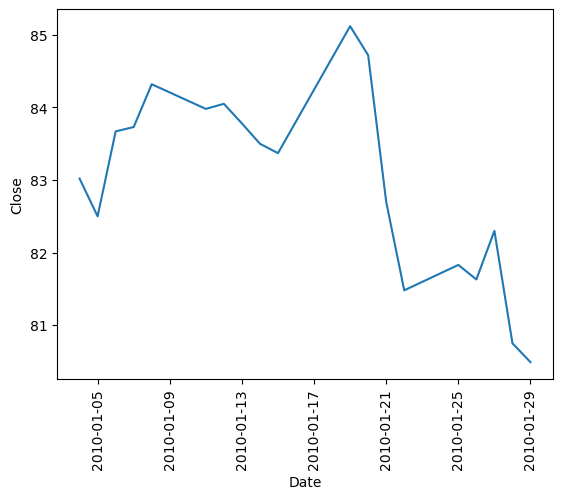

In [204]:
#visualizing one symbol for a certain period
stocksDF2010 = stocksDF[stocksDF['Year'] == 2010]
stocksDF2010MMM = stocksDF2010[stocksDF2010['Symbol'] == 'MMM']
stocksDF2010MMMJan = stocksDF2010MMM[stocksDF2010MMM['Month Name'] == 'January']
sns.lineplot(x='Date', y='Close', data=stocksDF2010MMMJan)
plt.xticks(rotation=90)
plt.show()

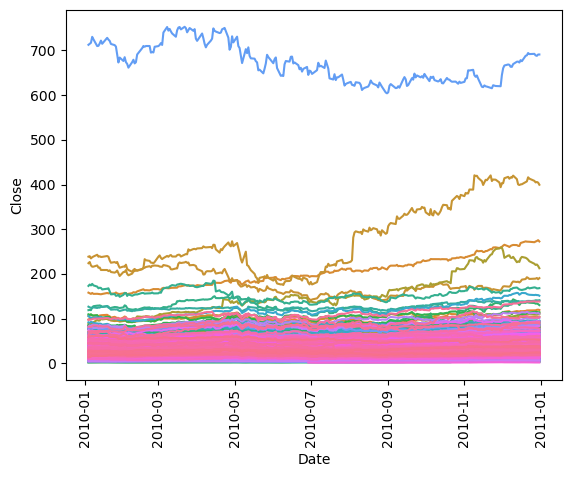

In [206]:
#visualizing all symbols for 2010
stocksDF2010 = stocksDF[stocksDF['Year'] == 2010]
sns.lineplot(x='Date', y='Close', data=stocksDF2010, hue='Symbol')
plt.xticks(rotation=90)
plt.legend().remove()
plt.show()

# Merge Datasets

In [222]:
#merging stocksDF and companiesDF
mergedDF = pd.merge(stocksDF, companiesDF[['Symbol', 'Longname', 'Sector', 'Industry', 'Weight']], how='left', on='Symbol')
mergedDF

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Year,Month,Month Name,Weekday,Weekday Name,Quarter,Day of Year,Week of Year,Longname,Sector,Industry,Weight
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0,2010,1,January,0,Monday,1,4,1,3M Company,Industrials,Conglomerates,0.001927
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0,2010,1,January,1,Tuesday,1,5,1,3M Company,Industrials,Conglomerates,0.001927
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0,2010,1,January,2,Wednesday,1,6,1,3M Company,Industrials,Conglomerates,0.001927
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0,2010,1,January,3,Thursday,1,7,1,3M Company,Industrials,Conglomerates,0.001927
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0,2010,1,January,4,Friday,1,8,1,3M Company,Industrials,Conglomerates,0.001927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621667,2022-10-17,ZTS,149.789993,149.789993,150.410004,147.009995,147.130005,2180400.0,2022,10,October,0,Monday,4,290,42,Zoetis Inc.,Healthcare,Drug Manufacturers—Specialty & Generic,0.002076
1621668,2022-10-18,ZTS,150.419998,150.419998,154.389999,149.770004,153.710007,2783100.0,2022,10,October,1,Tuesday,4,291,42,Zoetis Inc.,Healthcare,Drug Manufacturers—Specialty & Generic,0.002076
1621669,2022-10-19,ZTS,148.130005,148.130005,150.009995,145.880005,149.399994,1983700.0,2022,10,October,2,Wednesday,4,292,42,Zoetis Inc.,Healthcare,Drug Manufacturers—Specialty & Generic,0.002076
1621670,2022-10-20,ZTS,144.429993,144.429993,148.220001,144.169998,147.509995,2327200.0,2022,10,October,3,Thursday,4,293,42,Zoetis Inc.,Healthcare,Drug Manufacturers—Specialty & Generic,0.002076


In [224]:
#adding on a merge of indexDF
mergedDF = pd.merge(mergedDF, indexDF, how='left', on='Date')
mergedDF

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Year,Month,...,Weekday,Weekday Name,Quarter,Day of Year,Week of Year,Longname,Sector,Industry,Weight,S&P500
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0,2010,1,...,0,Monday,1,4,1,3M Company,Industrials,Conglomerates,0.001927,NaN
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0,2010,1,...,1,Tuesday,1,5,1,3M Company,Industrials,Conglomerates,0.001927,NaN
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0,2010,1,...,2,Wednesday,1,6,1,3M Company,Industrials,Conglomerates,0.001927,NaN
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0,2010,1,...,3,Thursday,1,7,1,3M Company,Industrials,Conglomerates,0.001927,NaN
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0,2010,1,...,4,Friday,1,8,1,3M Company,Industrials,Conglomerates,0.001927,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621667,2022-10-17,ZTS,149.789993,149.789993,150.410004,147.009995,147.130005,2180400.0,2022,10,...,0,Monday,4,290,42,Zoetis Inc.,Healthcare,Drug Manufacturers—Specialty & Generic,0.002076,3677.95
1621668,2022-10-18,ZTS,150.419998,150.419998,154.389999,149.770004,153.710007,2783100.0,2022,10,...,1,Tuesday,4,291,42,Zoetis Inc.,Healthcare,Drug Manufacturers—Specialty & Generic,0.002076,3719.98
1621669,2022-10-19,ZTS,148.130005,148.130005,150.009995,145.880005,149.399994,1983700.0,2022,10,...,2,Wednesday,4,292,42,Zoetis Inc.,Healthcare,Drug Manufacturers—Specialty & Generic,0.002076,3695.16
1621670,2022-10-20,ZTS,144.429993,144.429993,148.220001,144.169998,147.509995,2327200.0,2022,10,...,3,Thursday,4,293,42,Zoetis Inc.,Healthcare,Drug Manufacturers—Specialty & Generic,0.002076,3665.78
